<a href="https://colab.research.google.com/github/Alfi-Lukmanul/Data-Mining/blob/main/Tugas_Akhir_Alfi_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Heart = pd.read_csv("heart.csv")

In [ ]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
Heart.describe()
#statistik data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
x = Heart.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = Heart.iloc[:,-1].values

(array([[163., 140.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  48., 242.,  13.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  12.,  97., 125.,  58.,   7.,   3.,   0.,   1.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  23., 217.,  63.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  56.4, 112.8, 169.2, 225.6, 282. , 338.4, 394.8, 451.2,
        507.6, 56

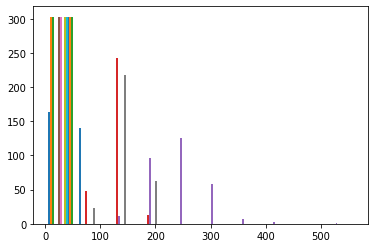

In [ ]:
plt.hist(x)
#kiri total value
#bawah angkanya

In [ ]:
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
print(x_train)

[[58.  1.  2. ...  2.  2.  3.]
 [52.  1.  0. ...  2.  1.  2.]
 [54.  1.  2. ...  2.  0.  3.]
 ...
 [56.  1.  3. ...  1.  0.  3.]
 [47.  1.  2. ...  2.  0.  2.]
 [58.  1.  1. ...  1.  0.  2.]]


In [ ]:
len(x_train)

227

In [ ]:
len(x)

303

In [ ]:
len(x_test)

76

In [ ]:
#Clasifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
#learning
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#prediksi data baru
x_baru = np.array([[39. , 1 ,	3 , 135, 208, 0, 1, 190, 1, 2.1, 2,0,1]])

In [ ]:
print(x_baru)

[[ 39.    1.    3.  135.  208.    0.    1.  190.    1.    2.1   2.    0.
    1. ]]


In [ ]:
prediksi = classifier.predict(x_baru)

In [ ]:
print(prediksi)

[1]


In [ ]:
y_prediksi = classifier.predict(x_test)

In [ ]:
print(y_prediksi)

[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0]


In [ ]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]


In [ ]:
#Perhitungan akurasi
print(f"Akurasi model KNN :{np.mean(y_prediksi == y_test)}")

Akurasi model KNN :0.6447368421052632


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23 10]
 [ 4 39]]
